# **1.선형 회귀 모델**

## **1-a. 데이터 불러오기**

### **당뇨병 환자 데이터 불러오기**




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

### **데이터 세트 확인 및 변환**

In [2]:
# diabetes 데이터 세트 설명 출력 (실행해서 확인해주세요.)
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

* age : 나이
* sex : 성별
* bmi : 체질량지수
* bp : 평균 혈압
* s1 : 혈중 총콜레스테롤
* s2 : 저밀도 지질단백질
* s3 : 고밀도 지질단백질
* s4 : 총 콜레스테롤 수치
* s5 : 혈중 트리글리세라이드 수치
* s6 : 혈당 수치

**``` ##### ``` 을 채워주세요.**

In [3]:
# diabetes 데이터 세트의 target 배열은 1년 후의 당뇨병이 진전된 정도임. 이를 y 칼럼으로 DataFrame에 추가함.
df['y'] = diabetes.target

In [4]:
# 데이터 세트의 shape 확인
print('diabetes 데이터 세트 크기 :', df.shape)

# 데이터 세트의 상위 5개 행 출력
df.head()

diabetes 데이터 세트 크기 : (442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [5]:
# 데이터 세트 피처의 Null 값 유무와 자료형 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  y       442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


## **1-b. 각 칼럼이 회귀 결과에 미치는 영향 알아보기**

**``` ##### ``` 을 채워주세요**

### **시각화로 알아보기**

In [6]:
import seaborn as sns

%matplotlib inline

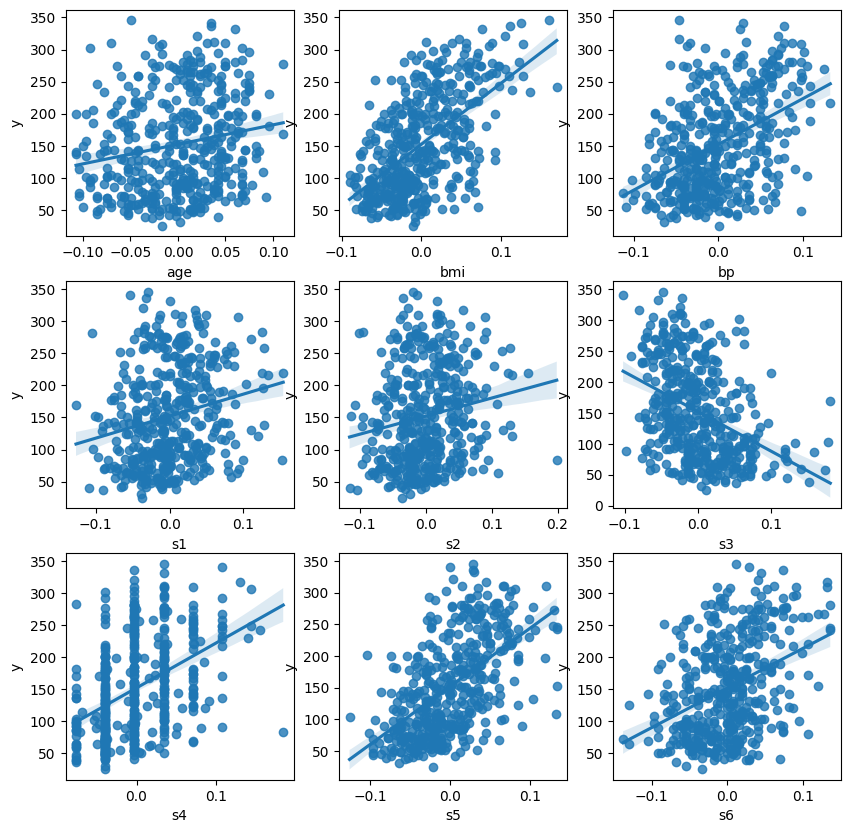

In [7]:
# 3개의 행과 3개의 열을 가진 subplots를 이용. axs는 3x3개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(10,10), ncols=3, nrows=3)
lm_features = ['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
for i, feature in enumerate(lm_features):
    row = int(i/3)
    col = i%3
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='y', data=df, ax=axs[row][col])

**Q. 어떤 변수의 feature 중요도가 가장 높게 나타나나요?**

A. bmi, 회귀직선의 기울기 절댓값이 가장 커보임.

### **상관계수로 알아보기**

In [8]:
# 변수 사이의 상관 계수 구하기
# hint: df는 pandas dataframe 이다. corr함수 이용하기)
diabetes_corr = df.corr()

In [9]:
# 회귀 분석 대상인 피처들과 target 사이의 상관계수만 슬라이싱한 후, abs()를 통해 양수로 변환하여 큰 순서대로 출력
diabetes_corr.loc[:'s6', 'y'].abs().sort_values(ascending=False)

bmi    0.586450
s5     0.565883
bp     0.441482
s4     0.430453
s3     0.394789
s6     0.382483
s1     0.212022
age    0.187889
s2     0.174054
sex    0.043062
Name: y, dtype: float64

**Q. 어떤 변수의 feature 중요도가 가장 높게 나타나나요?**

A. bmi, 타겟값과의 상관계수의 절댓값이 가장 크다

## **1-c. 단순 선형 회귀 모델**

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
# 상관계수가 가장 큰 변수 'bmi'를 독립변수로 설정
X = df.bmi.values
y = df.y.values

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

# 데이터 세트 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =156)

# 선형 회귀 OLS로 학습/예측/평가 수행.
lr1 = LinearRegression()
lr1.fit(X_train, y_train)
y_preds1 = lr1.predict(X_test)

mse1 = mean_squared_error(y_test, y_preds1)
rmse1 = np.sqrt(mse1)

print('단순 선형 회귀 평가 지표')
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse1, rmse1))
# 결정계수 R2 출력하기
print('Variance score : {0:.3f}'.format(lr1.score(X_train, y_train)))

단순 선형 회귀 평가 지표
MSE : 3726.176 , RMSE : 61.042
Variance score : 0.328


## **1-d. 다중 선형 회귀 모델**

In [12]:
y = df['y']
X = df.drop(['y'], axis=1, inplace=False)

# 데이터 세트 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =156)

# 선형 회귀 OLS로 학습/예측/평가 수행.
lr2 = LinearRegression()
lr2.fit(X_train, y_train)
y_preds2 = lr2.predict(X_test)

mse2 = mean_squared_error(y_test, y_preds2)
rmse2 = np.sqrt(mse2)

print('다중 선형 회귀 평가 지표')
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse2, rmse2))
# 결정계수 R2 출력하기
print('Variance score : {0:.3f}'.format(lr2.score(X_train, y_train)))

다중 선형 회귀 평가 지표
MSE : 2993.705 , RMSE : 54.715
Variance score : 0.521


**Q. 단순 선형 회귀 모델 ```lr1``` 과 다중 선형 회귀 모델 ```lr2``` 중 어떤 모델의 예측값이 더 믿을만한가요? 이유와 함께 답해주세요.**

A. lr2, R square 값이 더큽니다.

# **2. 경사 하강법**


## **2-a. 데이터 불러오기**

In [13]:
X = diabetes.data[:, 2:3]
y = diabetes.target.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =156)

## **2-b. 데이터 시각화**
- 주어진 당뇨병 환자 데이터를 산점도로 시각화 해보겠습니다.

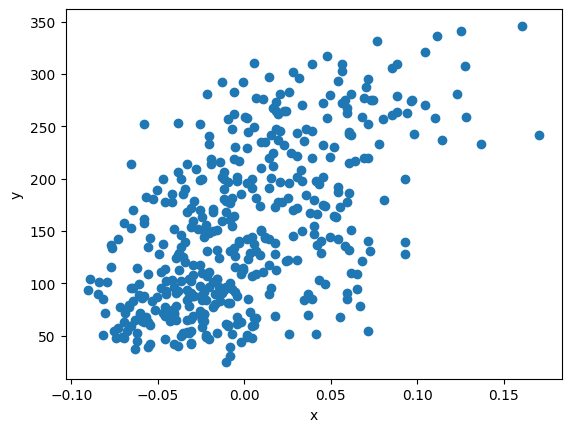

In [14]:
plt.scatter(X,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## **2-c. 비용 함수 정의**

RSS 방식으로 비용을 계산하는 ```get_cost()``` 함수의 빈칸을 채워주세요.

In [15]:
def get_cost(y, y_pred):
    N = len(y)
    # Q. RSS 방식으로 비용을 계산하는 get_cost 함수의 빈칸을 채워주세요
    cost = np.sum(np.square(y-y_pred))/N
    return cost

## **2-d. 회귀 계수 업데이트 함수 정의**
회귀 계수 w0, w1를 업데이트하는 ```get_weight_updates()``` 함수의 빈칸을 채워주세요.

In [16]:
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)

    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)

    # Q. 예측 값 계산, dot()를 사용해서 배열 X와 W1의 내적을 포함해서 구해주세요.
    y_pred = np.dot(X, w1.T) + w0

    diff = y-y_pred
    w0_factors = np.ones((N,1))

    # Q. w1, w0 업데이트 값 계산식을 참고하여, 배열 X와 diff의 내적을 포함해서 구해주세요.
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update

## **2-e. 미니배치 확률적 경사 하강법 구현**
- ```batch_size``` 만큼 일부 데이터를 추출해서 w값 업데이트에 사용하는 미니 배치 확률적 경사 하강 함수 ```stochastic_gradient_descent_steps()```의 빈칸을 채워주세요.

In [17]:
def stochastic_gradient_descent_steps(X, y, batch_size=100, iters=100000):
    w1 = np.zeros((1, X.shape[1]))
    w0 = np.zeros((1, 1))

    prev_cost = 100000
    iter_index =0

    for ind in range(iters):
        np.random.seed(ind)

        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]

        # Q. learning_rate = 0.01로 업데이트 값을 구해주세요.
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate = 0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

## **2-f. w1, w0를 구하고 비용 계산하기**

In [18]:
w1, w0 =  stochastic_gradient_descent_steps(X, y, iters=100000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1 * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:939.148 w0:152.133
Gradient Descent Total Cost:3890.6960


## **2-g. 회귀 plot 그리기**
구한 회귀 계수를 바탕으로, 선형 회귀 plot을 그려 확인해보겠습니다.

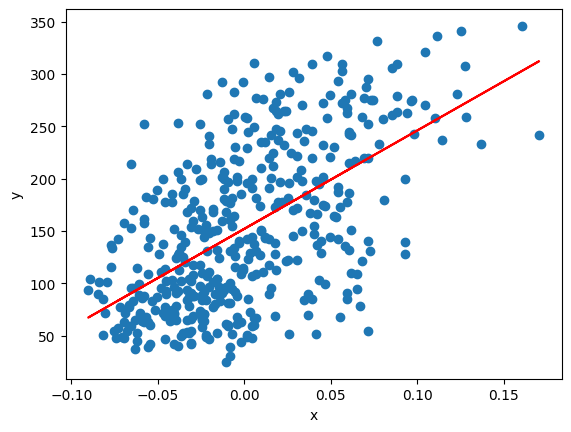

In [19]:
plt.scatter(X,y)
plt.plot(X, y_pred, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# **3.다항 회귀**


## **3-a. Pipeline을 이용한 다항 회귀 분석**
- 2차 다항 피처로 변환하고, 선형 회귀 모델을 만드는 과정을 Pipeline으로 연결해주세요.
- Pipeline의 step에 접근하여 회귀 계수를 구해주세요.

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

# Q. 2차 다항 피처로 변환하고, 선형회귀 모델 선언하는 과정을 Pipeline으로 연결해주세요
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression())]
                 )

model = model.fit(X, y)

# Q. named_steps를 이용해 회귀 계수를 구하고, 소수점 둘째 자리까지 반올림하여 저장해주세요
W = np.round(model.named_steps['linear'].coef_,2)
print('Polynomial 회귀 계수\n', W)

Polynomial 회귀 계수
 [[  0.   941.15 292.3 ]]


# **4.규제 선형 모델**

## **4-a.릿지(Ridge) 회귀**
- 앞에서 실행했던 당뇨병 환자 데이터를 Ridge 클래스로 다시 예측하고, 예측 성능을 ```cross_val_score()```로 평가해 보겠습니다.

In [21]:
# 코드를 실행해 주세요.
X_data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y_target = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state =156)

In [22]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [23]:
# 릿지의 alpha 값을 10으로 설정해 평균 rmse 살펴보기(cv = 5)
# 5 folds의 개별 rmse 값과 평균 rmse 값을 모두 출력하는 코드까지 작성하세요!

ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(rmse_scores,'\n', avg_rmse)

[67.38306009 73.69195858 72.69390484 66.06171563 73.91450862] 
 70.74902955101093


**이제 릿지의 alpha 값을 [0, 0.1, 1, 10, 100] 으로 변화시키면서 rmse와 회귀 계수 값의 변화를 살펴보겠습니다.**

In [24]:
# 릿지에 사용될 alpha 파라미터 값 정의
alphas = [0, 0.1, 1, 10, 100]

# 회귀계수 df 만들기
#coeff_df =
#해당 문제에서 사용할 필요 없다 생각하여 주석처리했습니다.

# alphas의 리스트 값을 반복하면서 alpha에 따른 평균 rmse 출력하
# (for문을 사용하고, for문 안에 위에서 실행했던 코드를 참고해 5 폴드의 평균 rmse를 계산하세요.)
# 아래에 코드 작성.
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha = {0:.4f}일 때 평균 rmse = {1:.4f}'.format(alpha, avg_rmse))

alpha = 0.0000일 때 평균 rmse = 54.6918
alpha = 0.1000일 때 평균 rmse = 54.8250
alpha = 1.0000일 때 평균 rmse = 58.4492
alpha = 10.0000일 때 평균 rmse = 70.7490
alpha = 100.0000일 때 평균 rmse = 76.3989


In [25]:
# 회귀계수 df 만들기
coeff_df = pd.DataFrame()

# alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가하세요
# hint: 파머완 p.323 참조, for문을 사용하세요
# 아래에 코드 작성.
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data , y_target)
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff

coeff_df

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
age,-10.009866,1.308705,29.466112,19.812842,2.897090
sex,-239.815644,-207.192418,-83.154276,-0.918430,0.585254
bmi,519.845920,489.695171,306.352680,75.416214,9.240720
bp,324.384646,301.764058,201.627734,55.025160,6.931289
s1,-792.175639,-83.466034,5.909614,19.924621,3.230957
s2,476.739021,-70.826832,-29.515495,13.948715,2.616766
s3,101.043268,-188.678898,-152.040280,-47.553816,-6.174550
s4,177.063238,115.712136,117.311732,48.259433,6.678027
s5,751.273700,443.812917,262.944290,70.143948,8.876851
s6,67.626692,86.749315,111.878956,44.213892,5.955597


## **4-b.라쏘(Lasso) 회귀**

In [26]:
from sklearn.linear_model import Lasso, ElasticNet

In [27]:
# 5주차 예습과제에서 생성했던 get_linear_reg_eval() 함수를 불러오세요.

def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        #cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출

        model.fit(X_data_n , y_target_n)
        if return_coeff:
            #alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff

    return coeff_df
#end of get_linear_regre_eval

In [28]:
# 라쏘에 사용될 alpha 파라미터 값을 리스트에 저장하세요.
# (alpha 값은 0.05, 0.1, 0.5, 1, 3)

lasso_alphas = [0.05, 0.1, 0.5, 1, 3]

# alpha 값의 변화에 따른 평균 RMSE를 출력하세요.
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

#######  Lasso #######
alpha 0.05일 때 5 폴드 세트의 평균 RMSE: 54.709 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 54.843 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 57.190 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 62.009 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 77.264 


In [29]:
# alpha 값에 따른 피처별 회귀 계수 살펴보기
# 반환된 coeff_lasso_df를 첫번째 칼럼 순으로 내림차순 정렬해 회귀계수 df를 출력하세요.

sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending = False)

,alpha:0.05,alpha:0.1,alpha:0.5,alpha:1,alpha:3
bmi,521.824312,517.186795,471.041874,367.703860,0.0
s5,512.047801,483.912648,408.022685,307.605418,0.0
bp,295.218036,275.077235,136.504084,6.298858,0.0
s6,52.927181,33.673965,0.000000,0.000000,0.0
age,-0.000000,-0.000000,0.000000,0.000000,0.0
s2,-0.000000,-0.000000,-0.000000,0.000000,0.0
s4,0.000000,0.000000,0.000000,0.000000,0.0
s1,-99.448797,-52.539365,-0.000000,0.000000,0.0
sex,-194.044334,-155.359976,-0.000000,-0.000000,0.0
s3,-222.718797,-210.157991,-58.319017,-0.000000,-0.0


## **4-c. 엘라스틱넷(ElasticNet) 회귀**

**alpha 값들의 변화만 살펴보기 위해 엘라스틱넷 회귀의 주요 파라미터 중 하나인 ```l1_ratio```는 <U>0.7</U>로 고정 시키겠습니다.**

In [30]:
# 엘라스틱넷에 사용될 alpha 파라미터 값을 리스트에 저장하세요.
# (alpha 값은 0.05, 0.1, 0.5, 1, 3)

elastic_alphas = [0.05, 0.1, 0.5, 1, 3]

# alpha 값의 변화에 따른 평균 RMSE를 출력하세요.

coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)

#######  ElasticNet #######
alpha 0.05일 때 5 폴드 세트의 평균 RMSE: 67.569 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 71.268 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 76.032 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 76.805 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 77.262 


In [31]:
# alpha 값에 따른 피처별 회귀 계수 살펴보기
# 반환된 coeff_elastic_df를 첫번째 칼럼 순으로 내림차순 정렬해 회귀계수 df 출력하세요.

sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.05,alpha:0.1,alpha:0.5,alpha:1,alpha:3
bmi,102.221866,57.938119,11.544017,4.744439,0.053248
s5,93.805106,54.278589,10.997870,4.487781,0.000000
bp,73.113739,42.039222,8.079540,2.991006,0.000000
s4,61.350120,37.750621,7.694049,2.837828,0.000000
s6,56.575570,34.082378,6.608643,2.266564,0.000000
age,23.239550,14.496770,2.029207,0.000000,0.000000
s1,22.237363,15.192917,2.527620,0.205676,0.000000
s2,13.420510,10.650735,1.604738,0.000000,0.000000
sex,-2.343069,0.000000,0.000000,0.000000,0.000000
s3,-61.937014,-36.339227,-6.932461,-2.417486,-0.000000


## **4-e. 데이터 스케일링**



In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

In [33]:
# 5주차 예습과제에서 생성했던 get_scaled_data를 불러오세요.

def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)

    return scaled_data

In [34]:
# 알파값은 0.1, 1, 10, 100으로 지정하겠습니다.
alphas = [0.1, 1, 10, 100]

# 파머완 330p에 소개된 5가지의 스케일링 방법을 사용하겠습니다.
scale_methods = [(None, None), ('Standard', None), ('Standard,', 2),
                ('MinMax', None), ('MinMax', 2), ('Log', None)]

# 이제, for문을 활용해 릿지회귀의 데이터 변환을 반복해주세요.
# '#######'을 채워주시면 됩니다.

for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method = scale_method[0], p_degree = scale_method[1],input_data = X_data)
    print('\n##변환 유형 :{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, y_target_n=y_target, verbose=False, return_coeff=False)


##변환 유형 :None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 54.825 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 58.449 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 70.749 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 76.399 

##변환 유형 :Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 54.691 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 54.699 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 54.761 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 55.164 

##변환 유형 :Standard,, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 54.696 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 58.429 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 70.745 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 76.398 

##변환 유형 :MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 54.731 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 54.769 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 56.875 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 68.803 

##변환 유형 :MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 55.028 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 54.151 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 54.448 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 60.657 

##변환 유형 :Log, Polynomial Degree:

In [35]:
# 이번에는 같은 방식으로 라쏘회귀의 데이터 변환을 반복해주세요.

for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method = scale_method[0], p_degree = scale_method[1],input_data = X_data)
    print('\n##변환 유형 :{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Lasso', params=alphas, X_data_n=X_data_scaled, y_target_n=y_target, verbose=False, return_coeff=False)


##변환 유형 :None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 54.843 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 62.009 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 77.264 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 77.264 

##변환 유형 :Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 54.686 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 54.708 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 57.012 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 77.264 

##변환 유형 :Standard,, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 54.843 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 62.009 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 77.264 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 77.264 

##변환 유형 :MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 54.715 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 55.274 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 77.264 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 77.264 

##변환 유형 :MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 54.351 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 55.116 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 77.264 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 77.264 

##변환 유형 :Log, Polynomial Degree:

In [36]:
# 마지막으로, 엘라스틱넷 회귀의 데이터 변환을 반복해주세요.

for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method = scale_method[0], p_degree = scale_method[1],input_data = X_data)
    print('\n##변환 유형 :{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('ElasticNet', params=alphas, X_data_n=X_data_scaled, y_target_n=y_target, verbose=False, return_coeff=False)


##변환 유형 :None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 71.268 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 76.805 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 77.264 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 77.264 

##변환 유형 :Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 54.745 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 55.373 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 64.958 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 77.264 

##변환 유형 :Standard,, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 71.268 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 76.805 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 77.264 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 77.264 

##변환 유형 :MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 57.184 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 69.920 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 77.190 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 77.264 

##변환 유형 :MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 54.623 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 62.616 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 77.147 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 77.264 

##변환 유형 :Log, Polynomial Degree:

# **5.로지스틱 회귀**
- 사이킷런에서 제공하는 와인 등급 데이터 세트로 로지스틱 회귀 분석 실습하기

## **5-a 데이터 불러오기**

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression

df = load_wine()
X, y = df.data, df.target

## **5-b. 데이터 세트 분리**

**정규 분포 형태 표준 스케일링 적용**

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 아래에 코드를 입력해주세요
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

**학습/테스트 데이터 세트 분리**
- test_size = 0.3

In [39]:
# 괄호 안의 빈칸을 채워주세요
X_train , X_test, y_train , y_test = train_test_split(data_scaled, y, test_size=0.3)

## **5-c.로지스틱 회귀를 이용한 학습 및 예측 수행**

In [40]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 생성
lr_clf = LogisticRegression()

# 학습
lr_clf.fit(X_train, y_train)

# 예측
lr_preds = lr_clf.predict(X_test)

**정확도 측정**

In [41]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 괄호 안의 빈칸을 채워주세요
print('accuracy: {0:.3f}'.format(accuracy_score(y_test, lr_preds)))

accuracy: 0.981


## **5-d.하이퍼 파라미터 최적화**
```GridSearchCV```를 이용해 하이퍼 파라미터 최적화하기
- solver: ['liblinear', 'lbfgs']
- penalty: ['l2', 'l1']
- C: [0.01, 0.1, 1, 1, 5, 10]

In [42]:
from sklearn.model_selection import GridSearchCV

# 괄호 안의 빈칸을 채워주세요
params={'solver': ['liblinear', 'lbfgs'] ,
        'penalty': ['l2', 'l1'] ,
        'C': [0.01, 0.1, 1, 1, 5, 10]  }

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy')
grid_clf.fit(data_scaled, y)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_,grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}, 최적 평균 정확도:0.989


# **6.회귀 트리**
* 앞 예제들에서 사용한 당뇨병 환자 데이터 세트 사용

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

## **6-a.데이터 세트 불러오기**




In [44]:
# 데이터 세트 로드
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

df['y']=diabetes.target
X = df.drop(['y'],axis=1,inplace=False)
y = df['y']

## **6-b. 랜덤 포레스트 회귀 트리 이용**
- random_state = 0
- n_estimators = 1000

In [45]:
rf = RandomForestRegressor(random_state=0, n_estimators=1000)

# 개별 negative MSE scores 계산하기
neg_mse_scores = cross_val_score(rf , X, y, scoring="neg_mean_squared_error", cv = 5)
# 개별 RMSE scores 계산하기
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
# 평균 MSE scores 계산하기
avg_rmse = np.mean(rmse_scores)

**출력**

In [46]:
print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores:  [-2994.11 -3112.26 -3547.44 -3272.69 -3709.92]
 5 교차 검증의 개별 RMSE scores :  [54.72 55.79 59.56 57.21 60.91]
 5 교차 검증의 평균 RMSE : 57.637 


## **6-c. 랜덤 포레스트, 결정 트리, GBM, XGBoost, LightGBM 모두 이용**

**입력 모델과 데이터 세트를 입력 받아 교차 검증으로 평균 RMSE 계산하는 함수 정의**

In [47]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

**각 유형의 회귀 트리 생성**
- 결정트리: random_state=0, max_depth=4
- 랜덤 포레스트: random_state=0, n_estimators=1000
- GBM: random_state=0, n_estimators=1000
- XGBoost: n_estimators=1000
- LightGBM: n_estimators=1000


In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [49]:
dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

**회귀 모델 반복하면서 평가 수행**

In [50]:
# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X, y)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

## **6-d.피처 중요도 시각화**
- ```index = X.columns```
- 중요도 순으로 정렬

<Axes: >

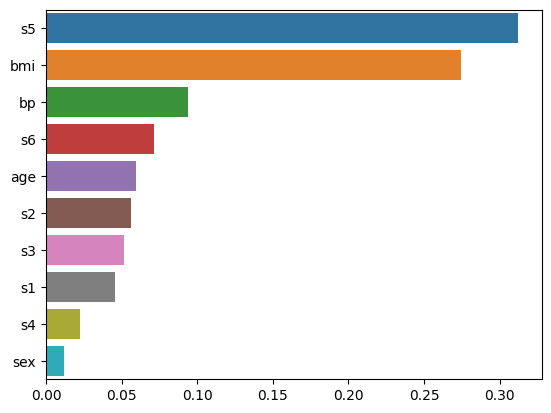

In [51]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators = 1000)
rf_reg.fit(X, y)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

## **6-e.선형 회귀와 비교하여 회귀 트리의 예측값 판단 시각화**
- 데이터 세트 100개만 샘플링
- ```random_state = 0```

(100, 2)


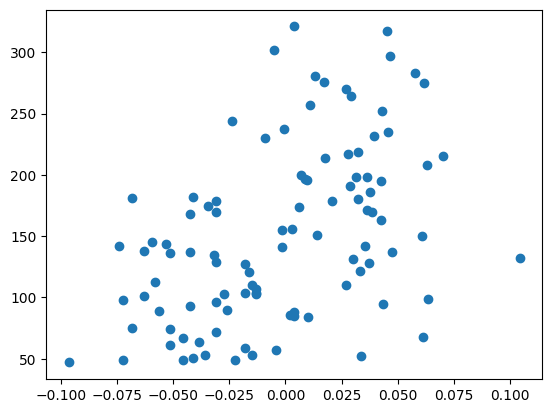

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

# 가장 큰 상관관계를 가지는 칼럼만 이용 (위 예제의 시각화 결과 참고)
#❓❓❓가장 큰 상관관계 = 가장 큰 중요도라고 할 수 있나요?? 약간 다른 개념이라고 생각했지만 우선 바로 위의 시각화 결과인 중요도를 기준으로 수행했습니다. ❓❓❓

df_sample = df[['s5' ,'y']]
df_sample = df_sample.sample(n=100,random_state=0)
print(df_sample.shape)

# 산점도로 시각화 하는 코드를 작성해주세요
plt.figure()
plt.scatter(df_sample.s5 , df_sample.y)

**선형 회귀, 결정 트리 이용하여 학습 및 예측**
- DecisionTreeRegressor의 ```max_depth```는 각각 2, 7

In [56]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

- X값을 ```-0.1~0.1```까지의 100개의 테스트 데이터 세트로 제공
* Hint: ```arange (step size = 0.002)```

In [57]:
X_test = np.arange(-0.1, 0.1, 0.002).reshape(-1, 1)

- 피처는 상관관계가 가장 큰 칼럼만 추출
- 결정 데이터 y 추출

In [58]:
X_feature = df_sample['s5'].values.reshape(-1,1)
y_target = df_sample['y'].values.reshape(-1,1)

- 학습 및 예측 수행

In [59]:
# 학습
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

# 예측
pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

**학습된 Regressor에 예측한 회귀선 그리기**

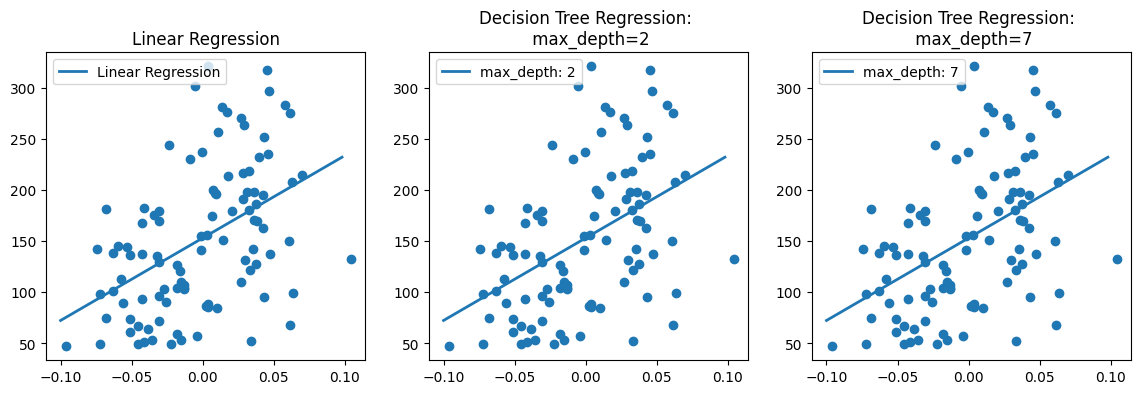

In [70]:
fig , (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(df_sample.s5 , df_sample.y)
ax1.plot(X_test, pred_lr,label="Linear Regression", linewidth=2 )
plt.legend()

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(df_sample.s5 , df_sample.y)
ax2.plot(X_test, pred_lr,label="max_depth: 2", linewidth=2 )
plt.legend()

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(df_sample.s5 , df_sample.y)
ax3.plot(X_test, pred_lr,label="max_depth: 7", linewidth=2 )


ax1.legend()
ax2.legend()
ax3.legend()